# Wheat Dataset Analysis
In this notebook, we'll conduct a comprehensive analysis of the wheat dataset. The analysis will encompass data loading, exploration, cleaning, and transformation. By the end, we'll have a clear understanding of the dataset's structure, its missing values, and any necessary transformations for further analysis.


# Step 1: Data exploration:

## Library Imports


We start by importing the `pandas` library, which will help us load, explore, and transform the dataset.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Loading the wheat Dataset

Next, we load the dataset into a DataFrame, which is a 2-dimensional labeled data structure in pandas. This allows us to view and manipulate the data in a tabular form.

In [2]:
# Load the dataset
data = pd.read_csv('./resources/CropStats.csv')
data.head()


,Unnamed: 0,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2,notes
0,0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.31,NaN,NaN
1,1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.47,NaN,NaN
2,2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.27,NaN,NaN
3,3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.33,NaN,NaN
4,4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.28,NaN,NaN


## 2. Data filtering

We filter the dataset based on crop type, we're only intrested in wheat crop.

In [3]:
# Filter the data for "wheat", "winter wheat", and "spring wheat"
filtered_data = data[data['crop'].isin(['wheat', 'winter wheat', 'spring wheat'])]

# Display the first few rows of the filtered dataframe
data = filtered_data
data.head()

,Unnamed: 0,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2,notes
0,0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.31,NaN,NaN
1,1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.47,NaN,NaN
2,2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.27,NaN,NaN
3,3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.33,NaN,NaN
4,4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.28,NaN,NaN



## 3. Inspecting Data Types

Understanding the data types of each column is crucial. It informs us about the nature of the data we're dealing with and helps identify if a column's type aligns with the kind of data it represents.

In [4]:

# Inspect the data types of the columns
data_types = data.dtypes
data_types


Unnamed: 0               int64
Harvest_year             int64
admin0                  object
admin1                  object
crop                    object
hectares (ha)          float64
production (tonnes)    float64
year                     int64
yield(tonnes/ha)       float64
admin2                 float64
notes                   object
dtype: object

The data types seem appropriate for each column, except for the admin2 column which may need to be converted if it's supposed to be a categorical variable instead of numeric. Additionally, we still have the redundant year columns (Harvest_year and year) to address.

## 4. Descriptive Statistics of the Dataset

Descriptive statistics provide a quick summary of the central tendencies, dispersion, and shape of the dataset's distribution. This step helps us grasp the dataset's overall characteristics.


In [5]:
# Display summary statistics
summary_statistics = data.describe()
summary_statistics

,Unnamed: 0,Harvest_year,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2
count,22027.000000,22027.000000,2.115300e+04,2.089600e+04,22027.000000,21292.000000,0.0
mean,17662.056885,1956.597176,6.366753e+05,1.178976e+06,1956.587779,2.151840,NaN
std,11039.147354,38.040130,1.704784e+06,3.826165e+06,38.037994,1.595280,NaN
min,0.000000,1861.000000,0.000000e+00,0.000000e+00,1861.000000,0.053289,NaN
25%,7202.500000,1929.000000,4.800000e+04,7.184847e+04,1929.000000,1.028556,NaN
50%,15648.000000,1959.000000,1.932550e+05,2.971730e+05,1959.000000,1.614035,NaN
75%,27817.500000,1989.000000,5.674000e+05,9.849884e+05,1989.000000,2.806869,NaN
max,36706.000000,2019.000000,3.147000e+07,9.851000e+07,2018.000000,10.015200,NaN


**We can see that:**

- There's a strong correlation between Harvest_year and year, suggesting they are duplicates.
- The admin2 column has no data and might need to be dropped.
- The notes column has many missing values but contains categorical information that could be useful depending on the analysis.

## 5. Checking for Missing Values

Identifying missing values is essential as they can significantly impact the results of any analysis. Knowing where we have gaps allows us to make informed decisions on data imputation or removal.

In [6]:

# Check for missing values
missing_values = data.isnull().sum()
missing_values

Unnamed: 0                 0
Harvest_year               0
admin0                     0
admin1                  2126
crop                       0
hectares (ha)            874
production (tonnes)     1131
year                       0
yield(tonnes/ha)         735
admin2                 22027
notes                  19178
dtype: int64

Here's the summary of missing values in the filtered wheat dataset:

- admin1: 2,126 missing values, which is about 9.65% of its data.
- hectares (ha): 874 missing values, approximately 3.97% of its data.
- production (tonnes): 1,131 missing values, about 5.13% of its data.
- yield(tonnes/ha): 735 missing values, roughly 3.34% of its data.
- admin2: 22,027 missing values, which is 100% of its data; this column is entirely empty.
- notes: 19,178 missing values, making up 87.07% of its data; this column is mostly empty.

Given that admin2 is completely empty, it should be removed. The notes column, while mostly empty, may contain valuable information for specific analyses and needs a decision on how to handle it.

For the other columns with missing values, we should determine the best course of action.



## 6. Checking for Duplicated Rows

Duplicate rows can skew our analysis, so it's essential to identify and handle them. We'll check if there are any repeated rows in the dataset.


In [7]:
# Check for duplicated rows
duplicated_rows = data[data.duplicated()]
duplicated_rows_count = duplicated_rows.shape[0]
duplicated_rows_count

0

There are no duplicate rows in the filtered wheat dataset. Each row is unique based on the combination of all columns.


# Step 2: Data Cleaning and Transformation

To make our data more accessible and understandable, we'll perform several cleaning and transformation steps:
- Convert the 'Harvest_year' column to a proper date format.
- Drop columns that are redundant or have no meaningful data.
- Rename columns for better clarity.

In [8]:
# Convert 'Harvest_year' to datetime, drop columns, and rename
data['Harvest_year'] = pd.to_datetime(data['Harvest_year'], format='%Y').dt.year
columns_to_drop = ['Unnamed: 0', 'year', 'admin2']
data = data.drop(columns=columns_to_drop)
data = data.rename(columns={'admin0': 'country'})
data.head()

,Harvest_year,country,admin1,crop,hectares (ha),production (tonnes),yield(tonnes/ha),notes
0,1902,Austria,NaN,wheat,NaN,NaN,1.31,NaN
1,1903,Austria,NaN,wheat,NaN,NaN,1.47,NaN
2,1904,Austria,NaN,wheat,NaN,NaN,1.27,NaN
3,1905,Austria,NaN,wheat,NaN,NaN,1.33,NaN
4,1906,Austria,NaN,wheat,NaN,NaN,1.28,NaN


**The dataframe now has the following structure:**

- `Harvest_Date`: The date of the harvest (datetime format)
- `admin0`: The country name (string)
- `admin1`: Subnational region (string)
- `crop`: Type of wheat (string)
- `Harvested_Area_ha`: Area harvested in hectares (floating-point number)
- `Production_Tonnes`: Production in tonnes (floating-point number)
- `Yield_Tonnes_per_ha`: Yield in tonnes per hectare (floating-point number)
- `notes`: Additional notes (string)

## 1. The `notes` column
- Let's try and explore the notes column:

In [9]:
# Explore unique values in the 'notes' column
unique_notes = data['notes'].unique()

# Sample entries where 'notes' column is populated
sample_notes_entries = data[data['notes'].notnull()].sample(5)

unique_notes, sample_notes_entries[['admin1','notes']]

(array([nan, 'FAO country level data', 'INSEE code 11', 'INSEE code 21',
        'INSEE code 22', 'INSEE code 23', 'INSEE code 24', 'INSEE code 25',
        'INSEE code 26', 'INSEE code 31', 'INSEE code 41', 'INSEE code 42',
        'INSEE code 43', 'INSEE code 52', 'INSEE code 53', 'INSEE code 54',
        'INSEE code 72', 'INSEE code 73', 'INSEE code 74', 'INSEE code 82',
        'INSEE code 83', 'INSEE code 91', 'INSEE code 93', 'INSEE code 94',
        'Hebei, Beijing, Tianjin, Liaoning, Jilin, Heilongjiang, Nei Mongol',
        'Sichuan, Xizang, Chongqing'], dtype=object),
                     admin1          notes
 7345              Auvergne  INSEE code 83
 6706           Rhône-Alpes  INSEE code 82
 6892        Lower Normandy  INSEE code 25
 5988        Upper Normandy  INSEE code 23
 6510  Languedoc-Roussillon  INSEE code 91)

The `notes` column appears to contain specific codes and regional groupings. Here's a summary:

**Unique values in `notes`**:

- Several entries start with "INSEE code", followed by a two-digit number. INSEE codes are specific to France and are used to identify administrative regions.
- Some entries list multiple regions, such as "Hebei, Beijing, Tianjin, Liaoning, Jilin, Heilongjiang, Nei Mongol" and "Sichuan, Xizang, Chongqing".

**Sample entries where `notes` column is populated**:

- For instance, the region "Pays de la Loire" is associated with the "INSEE code 52".
- The region "Brittany" corresponds to "INSEE code 53".
- The region "Limousin" has the "INSEE code 74".

### Filtering and Cleaning Data for China

In [10]:
# Filter out rows related to China
china_data = data[data['country'] == 'China']

# For rows where 'notes' is not null, copy the content from 'notes' to 'admin1'
china_data.loc[china_data['notes'].notnull(), 'admin1'] = china_data['notes']

# Update the main dataframe with the changes
data.update(china_data)


data = data.drop(columns='notes')

 - For the Chinese data, it seems that more specific or accurate regional information is stored in the 'notes' column. Therefore, the code copies the content of 'notes' into 'admin1' for each row where 'notes' is not null. This step is done to enhance the dataset with better regional details, which might be critical for any analysis that requires more granular regional segmentation.
 - Once the relevant information from 'notes' has been incorporated into 'admin1', the 'notes' column is removed, because it is no longer needed. This might be a way to tidy up the dataset by removing redundant or unnecessary information, which simplifies the dataset and may make subsequent analyses more straightforward.

## 2. The `admin1` column:

**`admin1` (2,612 missing entries)** :

- This column represents subdivisions within a country or detailed regional information. The absence of values here could mean a variety of things. It's possible the data for those subdivisions wasn't available, or it might have been aggregated at the country level.

- **Solution**: For categorical variables like regions, it might be appropriate to use "Special value imputation" and assign a value like "Unknown" or "Not Specified" to these missing entries.

In [11]:
# # Define a function to concatenate "Unknown" with the country name if "admin1" is missing
def impute_admin1(row):
    if pd.isnull(row['admin1']):
        return "Unknown " + row['country']
    else:
        return row['admin1']

# Apply the function to each row in the DataFrame
data['admin1'] = data.apply(impute_admin1, axis=1)

# Verify if there are still any missing values in 'admin1'
missing_admin1_after = data['admin1'].isnull().sum()
missing_admin1_after

0

After applying the function, we verified that there are no longer any missing values in the admin1 column; the count of missing values is now 0. This means the imputation was successful, and the `admin1` column now contains complete information for each row.​

## 3. The `year` column:
For the sake of consistency with the maize dataset , we will only be working with data from 1930 onward.

In [12]:
# Filter the dataset for years from 1930 to 2017

data_1930_onward = data[
    (data['Harvest_year'] >= 1930) & 
    (data['Harvest_year'] <= 2017)

] 

- Some regions are missing some recorded years , we will add them and fill them ith the value of 0 

In [13]:
# Filter the data for years 1930 onward
data_1930_onward_filtered = data_1930_onward[data_1930_onward['Harvest_year'] >= 1930]

# Group by 'country', 'admin1', and 'crop' to get unique combinations
country_region_crop_combinations = (
    data_1930_onward_filtered.groupby(['country', 'admin1', 'crop']).size().reset_index()[['country', 'admin1', 'crop']]
)

# Create a DataFrame for the complete range of years from 1930 onwards for each country-region-crop combination
years = list(range(1930, data_1930_onward_filtered['Harvest_year'].max() + 1))
complete_data = pd.DataFrame(
    [(country, region, crop, year) for country, region, crop in zip(
        country_region_crop_combinations['country'], 
        country_region_crop_combinations['admin1'], 
        country_region_crop_combinations['crop']) 
     for year in years], 
    columns=['country', 'admin1', 'crop', 'Harvest_year']
)

# Merge the existing data with the complete data to identify missing entries
merged_data = complete_data.merge(data_1930_onward_filtered, on=['country', 'admin1', 'crop', 'Harvest_year'], how='left')

# Fill missing values with zeros
merged_data_filled = merged_data.fillna(0)

# Check the data to ensure every country-region-crop now starts from 1930
data = merged_data_filled.sort_values(by=['country', 'admin1', 'crop', 'Harvest_year'])
data.head()


,country,admin1,crop,Harvest_year,hectares (ha),production (tonnes),yield(tonnes/ha)
0,Argentina,Unknown Argentina,wheat,1930,6436023.0,4424628.0,0.687
1,Argentina,Unknown Argentina,wheat,1931,7902300.0,6321836.0,0.800
2,Argentina,Unknown Argentina,wheat,1932,6486300.0,5979200.0,0.922
3,Argentina,Unknown Argentina,wheat,1933,7200350.0,6556000.0,0.911
4,Argentina,Unknown Argentina,wheat,1934,7301300.0,7787000.0,1.067


The dataset has now been expanded to include a record for every country-region-year combination from 1930 to 2017. For the newly added records where data was missing, the `Production_Tonnes`, `Yield_Tonnes_per_ha`, and `Harvested_Area_ha` columns have been filled with zeros.

This process ensures that if a particular region did not have recorded data for a certain year, it now has a record for that year with zero values in these key columns, which may be important for analyses that require complete time series data.

## 4. Checking Discrepancies in Wheat Production Data

In this step, we are continuing our efforts to ensure the consistency and accuracy of wheat production data. Specifically, we have observed cases where certain countries do not cultivate 'wheat' but rather focus on 'winter wheat' and/or 'spring wheat.' Our objective is to investigate if there is a meaningful ***correlation*** or ***pattern*** between these different types of wheat crops in such regions. This analysis aims to provide insights into the preferences and agricultural practices related to wheat cultivation in these areas, where the traditional 'wheat' crop is absent.


In [14]:
# To perform this check, we need to ensure that we are looking for records within the same region, country, and year.
# We will group the data by these attributes and then check if there are any such discrepancies.

# First, create a DataFrame for all wheat-related crops and their production values, grouped by country, admin1, and Harvest_year
wheat_related = data[
    data['crop'].isin(['wheat', 'winter wheat', 'spring wheat'])
].groupby(['country', 'admin1', 'Harvest_year', 'crop'])['production (tonnes)'].sum().reset_index()

# Now we pivot this DataFrame to have separate columns for 'wheat', 'winter wheat', and 'spring wheat' production
wheat_pivot = wheat_related.pivot_table(
    values='production (tonnes)',
    index=['country', 'admin1', 'Harvest_year'],
    columns='crop',
    aggfunc='first'
).reset_index()

# Fill NaN values with zero for comparison
wheat_pivot.fillna(0, inplace=True)

# Now we can check for rows where 'wheat' production is zero and either 'winter wheat' or 'spring wheat' production is non-zero
discrepancies = wheat_pivot[
    (wheat_pivot['wheat'] == 0) &
    ((wheat_pivot['winter wheat'] > 0) | (wheat_pivot['spring wheat'] > 0))
]

discrepancies


crop,country,admin1,Harvest_year,spring wheat,wheat,winter wheat
6427,Netherlands,Unknown Netherlands,1933,59000.000000,0.0,3.580000e+05
6428,Netherlands,Unknown Netherlands,1934,71000.000000,0.0,4.240000e+05
6429,Netherlands,Unknown Netherlands,1935,58000.000000,0.0,3.980000e+05
6430,Netherlands,Unknown Netherlands,1936,50000.000000,0.0,3.690000e+05
6431,Netherlands,Unknown Netherlands,1937,42000.000000,0.0,3.010000e+05
...,...,...,...,...,...,...
8356,Sweden,Unknown Sweden,2014,335600.000000,0.0,2.750800e+06
8357,Sweden,Unknown Sweden,2015,315600.000000,0.0,2.984800e+06
8358,Sweden,Unknown Sweden,2016,339500.000000,0.0,2.502100e+06
8359,Sweden,Unknown Sweden,2017,298600.000000,0.0,3.000000e+06



We have found 170 records where the crop "wheat" has a zero value, but the crops "winter wheat" or "spring wheat" have non-zero values for the same country, region, and year. These discrepancies suggest that there may have been an issue with data entry or classification within the dataset.

Here are some examples from the discrepancies:

- For the Netherlands, across multiple years (1933 to 1937), "spring wheat" has production values recorded while "wheat" is listed as having zero production.
- For Sweden, from 2014 to 2017, "spring wheat" and "winter wheat" have substantial production values, yet "wheat" is reported as zero.
- In the United States, for the region "OTHER STATES" in 2017, "spring wheat" and "winter wheat" have production, but "wheat" does not.



## 5. Adding missing rows

In [15]:
# Filter out the necessary rows where crop is either "spring wheat" or "winter wheat"
wheat_types = ['spring wheat', 'winter wheat']
filtered_wheat_data = data[data['crop'].isin(wheat_types)]

# Identify the unique combinations of year, country, and admin1
unique_combinations = filtered_wheat_data[['Harvest_year', 'country', 'admin1']].drop_duplicates()

# Initialize a list to hold any new rows that need to be added
new_rows = []

# Check if a corresponding "wheat" row exists for each unique combination, if not, add a new row
for index, row in unique_combinations.iterrows():
    # Check if there is an existing row with crop as "wheat"
    exists = data[(data['Harvest_year'] == row['Harvest_year']) &
                        (data['country'] == row['country']) &
                        (data['admin1'] == row['admin1']) &
                        (data['crop'] == 'wheat')].any().any()
    
    # If not exists, prepare a new row to be added
    if not exists:
        new_row = {
            'country': row['country'],
            'admin1': row['admin1'],
            'Harvest_year': row['Harvest_year'],
            'crop': 'wheat',
            'hectares (ha)': 0,
            'production (tonnes)': 0,
            'yield(tonnes/ha)': 0
        }
        new_rows.append(new_row)

# Create a DataFrame from the new rows
new_wheat_df = pd.DataFrame(new_rows)

# Append the new rows to the original data, if there are any
if not new_wheat_df.empty:
    updated_wheat_data = pd.concat([data, new_wheat_df], ignore_index=True)
else:
    updated_wheat_data = data


These new rows ensure that our dataset now has a complete record for each country-region combination for every year between 1930 and 2017, including a record for "wheat" where previously only "spring wheat" or "winter wheat" might have been recorded.

### 5.1 Correcting missing values

#### 5.1.1 Correcting production values

For each row where crop is "wheat" and Production_Tonnes is 0, we will check if there is a corresponding row for the same year, region, and country where crop is "spring wheat" or "winter wheat" and Production_Tonnes is not 0.
If such a row exists, we will add the Production_Tonnes of "spring wheat" or "winter wheat" to the Production_Tonnes of "wheat" for that particular combination of year, region, and country.

In [16]:
# Correcting 'wheat' production values in the dataset where 'wheat' is zero and 'winter wheat' or 'spring wheat' have non-zero values.

# Step 1: Identify the rows where 'wheat' is zero but 'winter wheat' or 'spring wheat' have non-zero values.
# Group by 'country', 'admin1', and 'Harvest_year' and pivot to get separate columns for each crop type.
wheat_grouped = updated_wheat_data.groupby(['country', 'admin1', 'Harvest_year', 'crop'])['production (tonnes)'].sum().unstack().fillna(0)

# Find rows where 'wheat' is zero and ('winter wheat' or 'spring wheat') is non-zero
discrepancies = wheat_grouped[(wheat_grouped['wheat'] == 0) & 
                              ((wheat_grouped['winter wheat'] > 0) | 
                               (wheat_grouped['spring wheat'] > 0))]

# Step 2: Update these discrepancies by adding 'winter wheat' and 'spring wheat' production values.
wheat_grouped.loc[discrepancies.index, 'wheat'] = (wheat_grouped.loc[discrepancies.index, 'winter wheat'] + 
                                                    wheat_grouped.loc[discrepancies.index, 'spring wheat'])

# Step 3: Now we need to merge this corrected 'wheat' production back into the original dataframe.
# Reset index to turn multi-index into columns
wheat_grouped = wheat_grouped.reset_index()

# Melt the dataframe to turn it back into a long format
corrected_wheat_long = pd.melt(wheat_grouped, 
                               id_vars=['country', 'admin1', 'Harvest_year'], 
                               value_vars=['wheat', 'winter wheat', 'spring wheat'],
                               var_name='crop', 
                               value_name='production (tonnes)')

# Step 4: Merge the corrected 'wheat' production values back into the original dataframe
wheat_df_corrected = updated_wheat_data.drop('production (tonnes)', axis=1).merge(
    corrected_wheat_long,
    on=['country', 'admin1', 'Harvest_year', 'crop'],
    how='left'
)

# Return the updated DataFrame
wheat_df_corrected.drop_duplicates().sort_values(by=['country', 'admin1', 'Harvest_year', 'crop']).reset_index(drop=True)
updated_wheat_data = wheat_df_corrected


#### 5.1.1 Correcting hectare values

In [17]:
# Step 1: Group by 'country', 'admin1', and 'Harvest_year' and pivot to get separate columns for each crop type for hectares.
wheat_grouped = updated_wheat_data.groupby(['country', 'admin1', 'Harvest_year', 'crop'])['hectares (ha)'].sum().unstack().fillna(0)

# Find rows where 'wheat' is zero and ('winter wheat' or 'spring wheat') is non-zero
discrepancies = wheat_grouped[(wheat_grouped['wheat'] == 0) & 
                              ((wheat_grouped['winter wheat'] > 0) | 
                               (wheat_grouped['spring wheat'] > 0))]

# Step 2: Update these discrepancies by adding 'winter wheat' and 'spring wheat' hectares values.
wheat_grouped.loc[discrepancies.index, 'wheat'] = (wheat_grouped.loc[discrepancies.index, 'winter wheat'] + 
                                                    wheat_grouped.loc[discrepancies.index, 'spring wheat'])

# Step 3: Reset index to turn the multi-index into columns and melt the dataframe back into a long format
wheat_grouped = wheat_grouped.reset_index()
corrected_wheat_long = pd.melt(wheat_grouped, 
                               id_vars=['country', 'admin1', 'Harvest_year'], 
                               value_vars=['wheat', 'winter wheat', 'spring wheat'],
                               var_name='crop', 
                               value_name='hectares (ha)')

# Step 4: Merge the corrected 'wheat' hectares back into the original dataframe
wheat_df_corrected = updated_wheat_data.drop('hectares (ha)', axis=1).merge(
    corrected_wheat_long,
    on=['country', 'admin1', 'Harvest_year', 'crop'],
    how='left'
)

# Remove duplicates if any and reset the index
wheat_df_corrected = wheat_df_corrected.drop_duplicates().sort_values(by=['country', 'admin1', 'Harvest_year', 'crop']).reset_index(drop=True)

# Update the original DataFrame with the corrected values
updated_wheat_data = wheat_df_corrected

# Now, updated_wheat_data should have the corrected hectares values


#### 5.1.3 Dropping redundant rows

In [18]:
# Drop rows where 'crop' is 'spring wheat' or 'winter wheat'
data_without_specific_wheats = updated_wheat_data[~updated_wheat_data['crop'].isin(['spring wheat', 'winter wheat'])]

data_without_specific_wheats.head()
updated_wheat_data = data_without_specific_wheats

## 6. Addressing Different Types of Missing Values

To correct the zero values in the dataset:

- For rows where both hectares and production are available but yield is zero, we will replace the zero yield with the calculated value: production divided by hectares.
- For rows where both yield and hectares are available but production is zero, we will replace the zero production with the calculated value: yield multiplied by hectares.
- For rows where both production and yield are available but hectares is zero, we will replace the zero hectares with the calculated value: production divided by yield.

Let's apply these rules only to rows where the necessary values to perform the calculations are not zero, to avoid incorrect inferences from zero values that are legitimately zero (such as no production or no hectares planted)

In [19]:
# Replace zero values in the dataset with calculated values where appropriate
def replace_zero_values(row):
    if row['hectares (ha)'] != 0 and row['production (tonnes)'] != 0 and row['yield(tonnes/ha)'] == 0:
        row['yield(tonnes/ha)'] = row['production (tonnes)'] / row['hectares (ha)']
    if row['yield(tonnes/ha)'] != 0 and row['hectares (ha)'] != 0 and row['production (tonnes)'] == 0:
        row['production (tonnes)'] = row['yield(tonnes/ha)'] * row['hectares (ha)']
    if row['production (tonnes)'] != 0 and row['yield(tonnes/ha)'] != 0 and row['hectares (ha)'] == 0:
        row['hectares (ha)'] = row['production (tonnes)'] / row['yield(tonnes/ha)']
    return row

# Apply the function to replace zero values
replaced_data = updated_wheat_data.apply(replace_zero_values, axis=1)

# Calculate the number of zero values replaced for each column
replaced_counts = {
    'hectares_replaced': (updated_wheat_data['hectares (ha)'] == 0) & (replaced_data['hectares (ha)'] != 0),
    'production_replaced': (updated_wheat_data['production (tonnes)'] == 0) & (replaced_data['production (tonnes)'] != 0),
    'yield_replaced': (updated_wheat_data['yield(tonnes/ha)'] == 0) & (replaced_data['yield(tonnes/ha)'] != 0)
}

replaced_counts_sum = {k: v.sum() for k, v in replaced_counts.items()}
replaced_counts_sum

{'hectares_replaced': 0, 'production_replaced': 317, 'yield_replaced': 118}

In [20]:
updated_wheat_data = replaced_data

### 6.1 Visualizing Regions with Consistent Zero Data

In this part of our data analysis, we've conducted an evaluation to determine the prevalence of complete zero data records (zero production, zero hectares, and zero yield) for specific regions. The visualization provides insights into regions with substantial data gaps, which can impact the accuracy and reliability of our analysis.

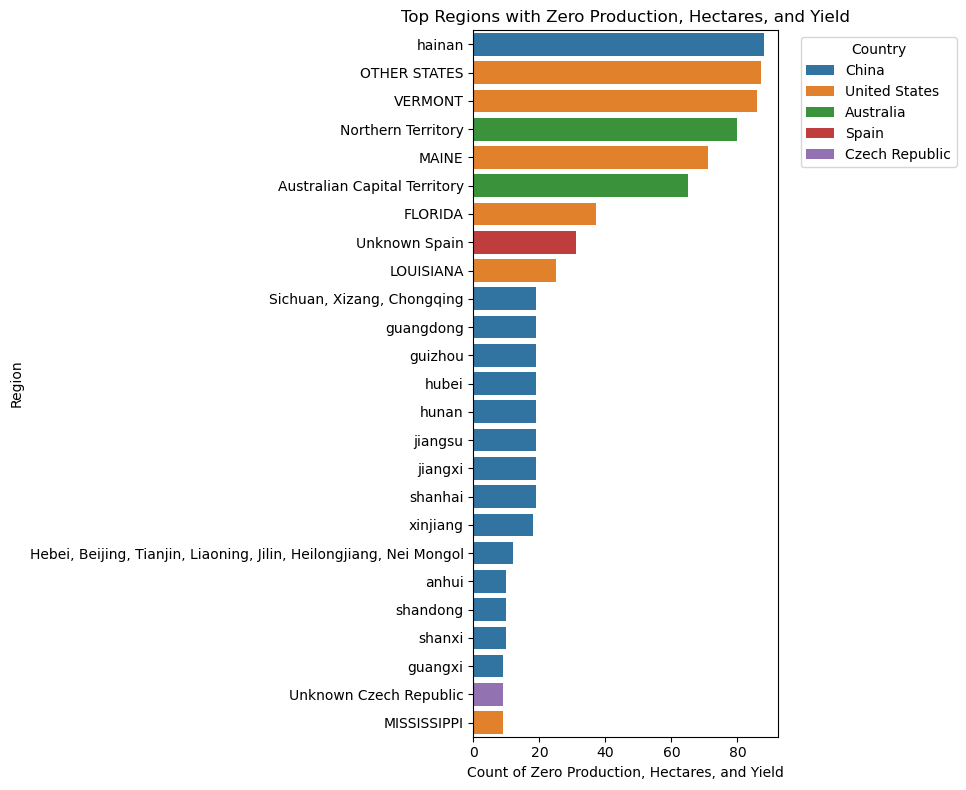

In [21]:
# Count the number of times a specific region has 0 production, 0 hectares, and 0 yield
zero_all_counts = updated_wheat_data[(updated_wheat_data['production (tonnes)'] == 0) & 
                                (updated_wheat_data['hectares (ha)'] == 0) & 
                                (updated_wheat_data['yield(tonnes/ha)'] == 0)].groupby(['country', 'admin1']).size().reset_index(name='count')

# Sort the counts and get the top regions with the most zeros
zero_all_counts_sorted = zero_all_counts.sort_values(by='count', ascending=False)

# Create the visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='admin1', data=zero_all_counts_sorted.head(25), hue='country', dodge=False)
plt.title('Top Regions with Zero Production, Hectares, and Yield')
plt.xlabel('Count of Zero Production, Hectares, and Yield')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


**Conclusion and Next Steps:**

Based on the visualization, we have identified regions with consistent zero data entries, indicating potential data quality issues. The next steps may involve a decision to exclude these regions from further analysis to maintain the accuracy and reliability of our findings.

This visual assessment provides valuable insights for data quality improvement and analysis refinement.

### 6.2 Filtering Regions with Insufficient Data Reporting



In [22]:
# Calculate the total number of records for each region
total_counts = updated_wheat_data.groupby(['country', 'admin1']).size().reset_index(name='total_count')

# Merge the zero counts with total counts to calculate the percentage
merged_counts = pd.merge(zero_all_counts, total_counts, on=['country', 'admin1'])

# Calculate the percentage of zero counts out of total counts for each region
merged_counts['zero_percentage'] = merged_counts['count'] / merged_counts['total_count'] * 100

# Filter out regions with more than 50% zero counts
filtered_regions = merged_counts[merged_counts['zero_percentage'] <= 50]

# Drop the regions with more than 50% zero counts from the original data
filtered_data = updated_wheat_data.merge(filtered_regions[['country', 'admin1']], on=['country', 'admin1'], how='right')

# Now we should update the zero counts based on the filtered data
updated_zero_counts = filtered_data[(filtered_data['production (tonnes)'] == 0) & 
                                    (filtered_data['hectares (ha)'] == 0) & 
                                    (filtered_data['yield(tonnes/ha)'] == 0)].groupby(['country', 'admin1']).size().reset_index(name='count')

# Sorting the updated zero counts
updated_zero_counts_sorted = updated_zero_counts.sort_values(by='count', ascending=False)

# Display the resulting DataFrame
merged_counts.sort_values(by='zero_percentage',ascending=False).head()


,country,admin1,count,total_count,zero_percentage
13,China,hainan,88,88,100.000000
55,United States,OTHER STATES,87,88,98.863636
56,United States,VERMONT,86,88,97.727273
2,Australia,Northern Territory,80,88,90.909091
53,United States,MAINE,71,88,80.681818


Our analysis has identified regions within countries that haven't reported data for 50% of the years, indicating potential inconsistencies or gaps in the data.

Here are some of the regions that will be dropped, along with their zero percentage:

- China, hainan (100% zeros)
- United States, OTHER STATES (98.89% zeros)
- United States, VERMONT (97.72% zeros)
- Australia, Northern Territory (90.90% zeros)
- United States, MAINE (80.68% zeros)
...
These regions reported zero agricultural activity for maize for more than half of the years since 1930.

This process ensures that we maintain data quality and focus on regions with more reliable and consistent data for further analysis. The resulting data represents a more robust and refined dataset for our study.

In [23]:
updated_wheat_data = filtered_data

### Replace every 0 with NaN

In [24]:
# Replace every 0 with NaN in the corrected column names
updated_wheat_data['production (tonnes)'] = updated_wheat_data['production (tonnes)'].replace(0, np.nan)
updated_wheat_data['hectares (ha)'] = updated_wheat_data['hectares (ha)'].replace(0, np.nan)

### Checking for missing values

In [25]:
# Check for missing values
missing_values = updated_wheat_data.isnull().sum()
missing_values


country                  0
admin1                   0
crop                     0
Harvest_year             0
yield(tonnes/ha)         0
production (tonnes)    642
hectares (ha)          649
dtype: int64

## 7. Data Imputation for Zero Values and Data Smoothing

The focus of this section is to address zero values in key production columns, which may represent missing or unrecorded data, and to apply imputation techniques to estimate these missing values.

Given these observations, here are a few imputation methods that could be appropriate:

- Linear Interpolation: This could be a good starting point given the trends in the data, as it assumes a straight-line relationship between the points before and after the missing data.

- Polynomial or Spline Interpolation: If the trends appear to be non-linear, these methods might provide a better fit for the data.

- Time Series Decomposition: If we decompose the series and find a stable trend, we might be able to impute the missing data based on this trend component.

- Model-Based Imputation: Fitting a time series model (like ARIMA) to the non-missing data and using it to predict the missing values could also be a good approach if the data has a strong autocorrelation structure.


*We decided to use Linear interpolation.*
- Linear interpolation is a straightforward method that will fill in the missing values by connecting the points immediately before and after the missing data with a straight line. This approach assumes that the change between observations is linear, which can be reasonable if the gaps are not too large and the data doesn't show strong non-linear trends.


**We still have MISSING VALUES.**
The NaN values in both hectares (ha) and production (tonnes) columns are distributed throughout the dataset, and not just at the beginning or end. This indicates that the reason linear interpolation did not fill these NaN values is not because they are at the edges, but possibly because these NaN values are isolated or surrounded by other NaN values, making interpolation between two non-NaN values impossible.

To address this, we might need to take a different approach for these isolated or clustered NaN values:

- Forward Fill (ffill) or Backward Fill (bfill): If the NaN values are at the beginning or end of the series, or if they are isolated, we can fill them in with the nearest available value.
.
- Hybrid Approach: Use interpolation where possible and then apply forward/backward filling for remaining NaN values.

*We decided to use Hybrid Approach as it fits our problem.*


In [26]:

# Sort the DataFrame by 'country', 'admin1', and 'Harvest_year'
cropstats_maize_df_sorted = updated_wheat_data.sort_values(by=['admin1', 'Harvest_year'])

# Group the data by 'country' and 'admin1'
grouped = cropstats_maize_df_sorted.groupby(['admin1'])

# Apply linear interpolation within each group
cropstats_maize_df_interpolated = grouped.apply(lambda g: g.interpolate(method='linear'))

# Now apply forward fill, then backward fill within each group
cropstats_maize_df_filled = grouped.apply(lambda g: g.ffill().bfill())

# Reset the index to flatten the DataFrame after group operations
cropstats_maize_df_filled.reset_index(drop=True, inplace=True)

cropstats_maize_df_filled.head()  # Display the first few rows to confirm the changes

updated_wheat_data = cropstats_maize_df_filled

## 8. Correcting yield values

In [27]:
# Replace yield values that are zero with the calculated value of production divided by hectares
updated_wheat_data .loc[updated_wheat_data ['yield(tonnes/ha)'] == 0, 'yield(tonnes/ha)'] = (
    updated_wheat_data ['production (tonnes)'] / updated_wheat_data ['hectares (ha)']
)

## 9. Final Check for Missing Values and Saving the Dataset

Before concluding our data preparation process, we perform a final check for missing values in the dataset to ensure that all zero values and gaps have been addressed effectively. 


In [28]:
# Check for missing values
missing_values = updated_wheat_data.isnull().sum()
missing_values


country                0
admin1                 0
crop                   0
Harvest_year           0
yield(tonnes/ha)       0
production (tonnes)    0
hectares (ha)          0
dtype: int64

In [29]:
updated_wheat_data.to_csv('wheat.csv')